<a href="https://colab.research.google.com/github/Neelov12/MAT-422/blob/main/NeelovAlamHW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 Linear Regression

# Contents:

> 1.3.1: QR Decomposition

> 1.3.2: Least Squares Problems


# 1.3.1: QR Decomposition

In this section, I will demonstrate the use of QR Decomposition by solving the following problem:

> Find Q and R for the QR Factorization of A

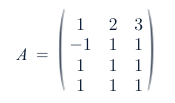
  

In [14]:
import math
import numpy as np

A = ([[1,2,3],
     [-1,1,1],
     [1,1,1],
     [1,1,1]])

First, to find Q, we must find the orthognal basis of A. To do this, we will use the Gram-Schmidt process from section 1.2.3. Using it, we find that the orthogonal basis, X, is

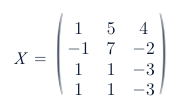

Next, we must find the orthonormal set to find Q. We do this by performing the following calculations:

In [15]:

# Find the distance of each column vector

dis_col_1 = math.sqrt(1*1 + (-1*-1) + 1*1 + 1*1)
dis_col_2 = math.sqrt(5*5 + 7*7 + 1*1 + 1*1)
dis_col_3 = math.sqrt(4*4 + (-2*-2) + (-3*-3) + (-3*-3))

# Find orthonormal set

matrixX_col1 = np.array([1, -1,1, 1])
matrixX_col2 = np.array([5, 7, 1, 1])
matrixX_col3 = np.array([4,-2,-3,-3])

dis1 = lambda i: i / dis_col_1
dis2 = lambda i: i / dis_col_2
dis3 = lambda i: i / dis_col_3

vectorized_dis1 = np.vectorize(dis1)
vectorized_dis2 = np.vectorize(dis2)
vectorized_dis3 = np.vectorize(dis3)

matrixX_non_transposed = np.array([vectorized_dis1(matrixX_col1),
                                   vectorized_dis2(matrixX_col2),
                                   vectorized_dis3(matrixX_col3)])

# Transpose it to turn row vectors into column vectors

matrixX = matrixX_non_transposed.transpose()

print("This is the matrix Q: \n")
print(matrixX)

This is the matrix Q: 

[[ 0.5         0.57353933  0.64888568]
 [-0.5         0.80295507 -0.32444284]
 [ 0.5         0.11470787 -0.48666426]
 [ 0.5         0.11470787 -0.48666426]]


Next, let's find R
> A = QR

> Likewise, Q^t*A = R, where Q^t represents the transposition of Q

In [17]:
# The variable matrixX_non_transposed is just matrixX transposed. But, let's tranpose matrixX anyway

matrixX_transposed = matrixX.transpose()

# Find Q^t*A

R = np.matmul(matrixX_transposed, A)

print("R = \n")
print(R)

R = 

[[2.00000000e+00 1.50000000e+00 2.00000000e+00]
 [5.55111512e-17 2.17944947e+00 2.75298881e+00]
 [0.00000000e+00 0.00000000e+00 6.48885685e-01]]


Using these equations, we have found R using QR decomposition

# 1.3.2: Least Squares Problems

In this section, I will:
- Approximate a least squares solution to a system of equations, say, A𝐱 = 𝕓, that has no solution

Say,

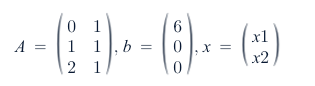

First, I will show that A𝐱 = 𝕓 has no solution

In [23]:
import sympy as sy
import numpy as np
from sympy import Matrix

Axb = sy.Matrix([[0,1,6],
                [1,1,0],
                [2,1,0]])

Axb.rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]),
 (0, 1, 2))

As you can see, there is no solution to this system

Next, we will take the least squares approximation by following the following formula:

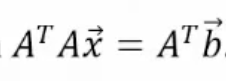

In [25]:
A = np.array([[0,1],
              [1,1],
              [2,1]])

b = np.array([[6],
              [0],
              [0]])

A_transposed = A.transpose()

A_t_A = np.matmul(A_transposed, A)

A_t_b = np.matmul(A_transposed, b)

# Combine into one array

eq = np.hstack((A_t_A, A_t_b))

# Convert to matrix

matrix_eq = Matrix(eq)

# Find rref

matrix_eq.rref()

(Matrix([
 [1, 0, -3],
 [0, 1,  5]]),
 (0, 1))

As you can see, the least squares solution is x1 = -3, x2 = 5